# Wilson Method for **SMOOTH TUBING**

This is a linear interpolator python script to take the wilson plot table data and spit out wanted variables depending on the user's input.

# 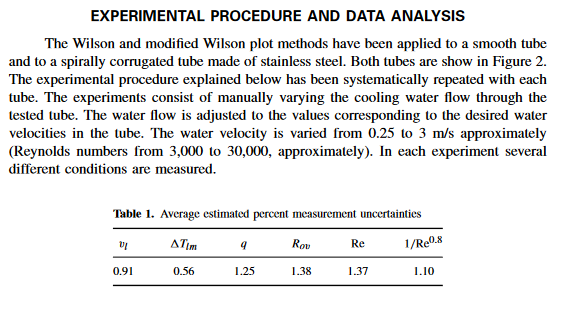

# Linear Interpolation / Data Preparation
First, let's calculate the variable by interpolating them.

Linear interpolation is automatic anyways, proceed down below

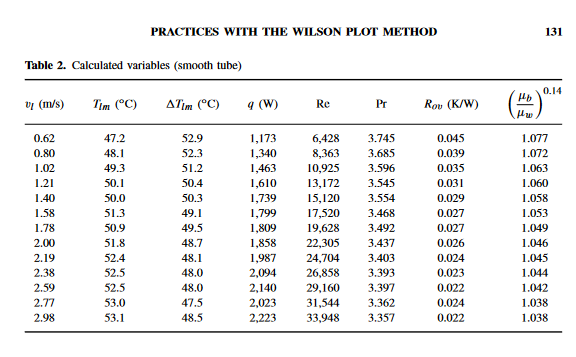

Parsed table data is as follows:



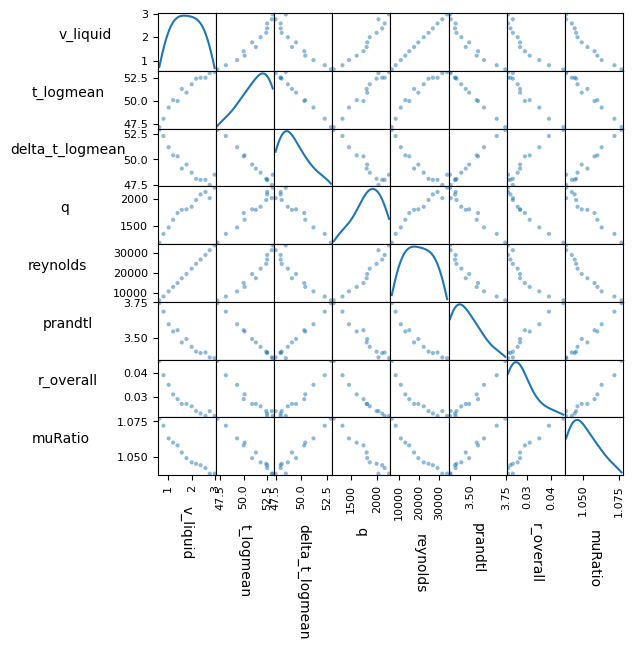

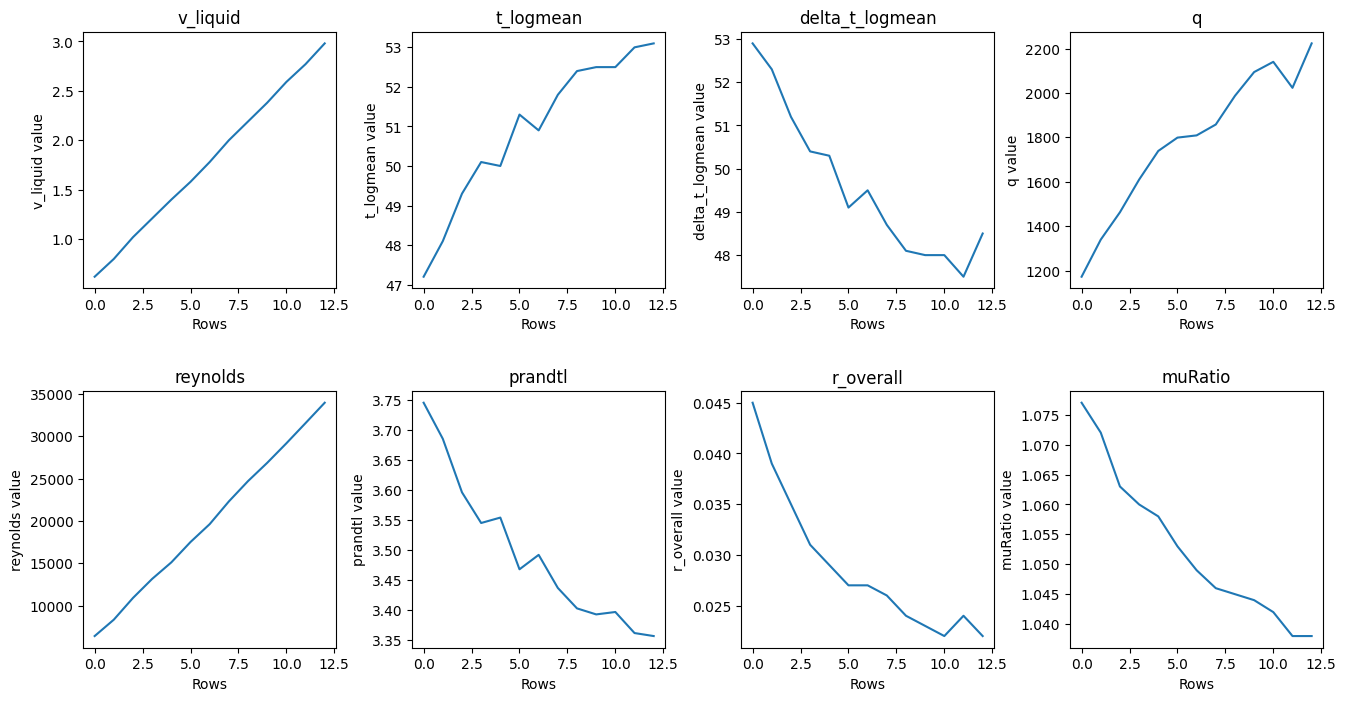

,v_liquid,t_logmean,delta_t_logmean,q,reynolds,prandtl,r_overall,muRatio
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,1.793846,50.938462,49.576923,1789.076923,19975.000000,3.494923,0.028769,1.052692
std,0.766111,1.895406,1.730199,319.593091,8966.977687,0.123858,0.007049,0.012552
min,0.620000,47.200000,47.500000,1173.000000,6428.000000,3.357000,0.022000,1.038000
25%,1.210000,50.000000,48.100000,1610.000000,13172.000000,3.397000,0.024000,1.044000
50%,1.780000,51.300000,49.100000,1809.000000,19628.000000,3.468000,0.027000,1.049000
75%,2.380000,52.500000,50.400000,2023.000000,26858.000000,3.554000,0.031000,1.060000
max,2.980000,53.100000,52.900000,2223.000000,33948.000000,3.745000,0.045000,1.077000


In [ ]:
#Import table
from google.colab import output
output.disable_custom_widget_manager()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as wt
from io import StringIO
#water velocity varied from 0.25 to 3m/s (3000 to 30000 Reynolds)
#table1
pUncertaintyInput = (
              "v_liquid delta_t_logmean q r_overall reynolds invReynolds\n"
              "0.91 0.56 1.25 1.38 1.37 1.10\n"
)


#table2
tableInput = (
              "v_liquid t_logmean delta_t_logmean q reynolds prandtl r_overall muRatio\n"
              "0.62 47.2 52.9 1173 6428 3.745 0.045 1.077\n"
              "0.80 48.1 52.3 1340 8363 3.685 0.039 1.072\n"
              "1.02 49.3 51.2 1463 10925 3.596 0.035 1.063\n"
              "1.21 50.1 50.4 1610 13172 3.545 0.031 1.060\n"
              "1.40 50.0 50.3 1739 15120 3.554 0.029 1.058\n"
              "1.58 51.3 49.1 1799 17520 3.468 0.027 1.053\n"
              "1.78 50.9 49.5 1809 19628 3.492 0.027 1.049\n"
              "2.00 51.8 48.7 1858 22305 3.437 0.026 1.046\n"
              "2.19 52.4 48.1 1987 24704 3.403 0.024 1.045\n"
              "2.38 52.5 48.0 2094 26858 3.393 0.023 1.044\n"
              "2.59 52.5 48.0 2140 29160 3.397 0.022 1.042\n"
              "2.77 53.0 47.5 2023 31544 3.362 0.024 1.038\n"
              "2.98 53.1 48.5 2223 33948 3.357 0.022 1.038\n",
)
# separated by space, rows by \n : parse string as csv and import it as pandas matrix dataframe

pUncertainty = pd.read_csv(StringIO(pUncertaintyInput[0]), sep=" ", header=0)
table = pd.read_csv(StringIO(tableInput[0]), sep=" ", header=0)

print("Parsed table data is as follows:\n")

# create scatter matrix with horizontal axis labels
scatter_matrix = pd.plotting.scatter_matrix(table, diagonal='kde', figsize=(6,6), grid=True)

# set horizontal axis label rotation to 0 degrees

for ax in scatter_matrix.ravel():
    ax.xaxis.label.set_rotation(-90)
    ax.yaxis.label.set_rotation(0)
    ax.xaxis.labelpad = 10
    ax.yaxis.labelpad = 40
#plt.plot(range(0,13), table['delta_t_logmean'])
plt.show()

fig, axs = plt.subplots(2, 4, figsize=(16, 8))
fig.subplots_adjust(wspace=0.3, hspace=0.4)

for i, column in enumerate(table.columns):
    axs[i//4,i%4].plot(range(0,table[column].shape[0]),table[column].values)
    axs[i//4,i%4].set_xlabel("Rows")
    axs[i//4,i%4].set_ylabel(column+" value")
    axs[i//4,i%4].set_title(column)

plt.show()

table.describe()

Variables plotted vs rows in order

(some of them are non-inversible, so wont work as a starting point)

**Interpolation**

In [ ]:
# Create dropdown menu widgets for selecting the variable and text box widget for entering the value
outputVarDropdown = wt.Dropdown(options=table.columns, description='Choose Output Variable [I Want..]: ', style={'description_width': 'initial', 'width': '150px'})
inputVarDropdown = wt.Dropdown(options=table.columns, description='Choose Input Variable [I Have..]: ', style={'description_width': 'initial', 'width': '150px'})
xInput = wt.FloatText(value=0.0, description='Enter the input variable value: ', style={'description_width': 'initial', 'width': '150px'})



#update confirmation
def PromptStatus(xVal,yVal,xVar,yVar):
    print(f"\nINPUT: [{xVar}]\nOUTPUT: [{yVar}]\nENTERED: [{xVal}]")
    print(f"INTERPOLATED [{yVar}]: {yVal}\n\n"
    "Out of range values may result in the values not changing (extrapolation doesn't work)\n"
    "Also using non-inversible data like delta_t_logmean or prandtl number as a starting point"
    " may result in error. (See above diagrams vs. rows & look up horizontal line test)\n\n"
    "I wouldn't use r_overall, prandtl, q, delta_t_logmean, and t_logmean as a STARTING variable\n")


# update variable function
def UpdateVar(var1="", var2="", xVal = 0.1):
    yVal=np.interp(xVal, table[var1], table[var2])
    PromptStatus(xVal,yVal,var1,var2)

# Display the widgets to the user

wt.interact(UpdateVar,var1=inputVarDropdown,var2=outputVarDropdown,xVal=xInput);

print("                                           Table:\n\n")
table.head(13)

interactive(children=(Dropdown(description='Choose Input Variable [I Have..]: ', options=('v_liquid', 't_logme…

                                           Table:




,v_liquid,t_logmean,delta_t_logmean,q,reynolds,prandtl,r_overall,muRatio
0,0.62,47.2,52.9,1173,6428,3.745,0.045,1.077
1,0.80,48.1,52.3,1340,8363,3.685,0.039,1.072
2,1.02,49.3,51.2,1463,10925,3.596,0.035,1.063
3,1.21,50.1,50.4,1610,13172,3.545,0.031,1.060
4,1.40,50.0,50.3,1739,15120,3.554,0.029,1.058
5,1.58,51.3,49.1,1799,17520,3.468,0.027,1.053
6,1.78,50.9,49.5,1809,19628,3.492,0.027,1.049
7,2.00,51.8,48.7,1858,22305,3.437,0.026,1.046
8,2.19,52.4,48.1,1987,24704,3.403,0.024,1.045
9,2.38,52.5,48.0,2094,26858,3.393,0.023,1.044


# **Literature Thermodynamics Data Importing**

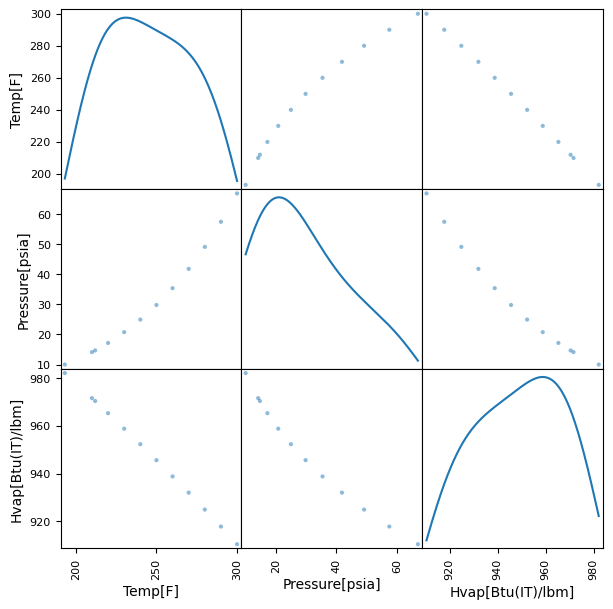

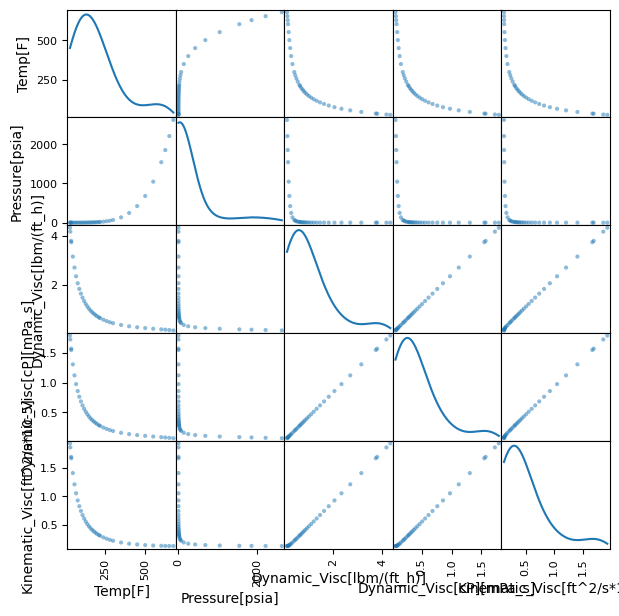

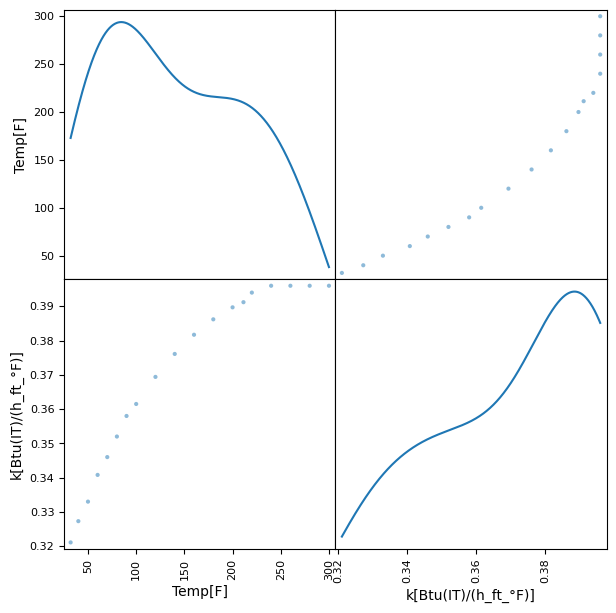

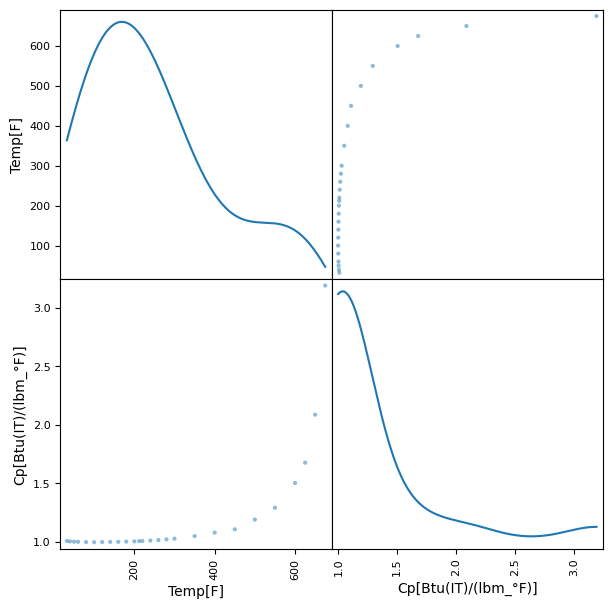

In [ ]:
#Saturation Hvap Table from Thermo Book and MSH
hvap_lit_input = {'Temp[F]':[193.19,210.0,211.99,220.0,230.0,240.0,250.0,260.0,270.0,280.0,290.0,300.0], #[F]
                  'Pressure[psia]':[10.0,14.13,14.695949,17.188,20.779,24.968,29.825,35.427,41.856,49.18,57.53,66.98], #[psia]
                  'Hvap[Btu(IT)/lbm]':[982.1,971.6,970.4,965.3,958.8,952.3,945.6,938.8,932.0,924.9,917.8,910.4] #[BTU/lbm]
}

hvapTable = pd.DataFrame(hvap_lit_input, columns=hvap_lit_input.keys())

density_water = (
                "Temp[F] Density[lbm/ft3]\n"
                "32.2 62.42\n"
                "34 62.42\n"
                "39.2 62.43\n"
                "40 62.42\n"
                "50 62.41\n"
                "60 62.36\n"
                "70 62.3\n"
                "80 62.22\n"
                "90 62.11\n"
                "100 62\n"
                "110 61.86\n"
                "120 61.71\n"
                "130 61.55\n"
                "140 61.38\n"
                "150 61.19\n"
                "160 61\n"
                "170 60.79\n"
                "180 60.58\n"
                "190 60.35\n"
                "200 60.12\n"
                "212 59.83\n"
                "220 59.63\n"
                "240 59.1\n"
                "260 58.53\n"
                "280 57.93\n"
                "300 57.29\n"
                "350 55.59\n"
                "400 53.67\n"
                "450 51.45\n"
                "500 48.92\n"
                "550 45.95\n"
                "600 42.36\n"
                "625 40.12\n"
                "650 37.35\n"
                "675 33.79\n",
)
densityTable = pd.read_csv(StringIO(density_water[0]), sep=" ", header=0)

#Water Dynamic Viscosity Table
visc_water = (
              "Temp[F] Pressure[psia] Dynamic_Visc[lbm/(ft_h)] Dynamic_Visc[cP][mPa_s] Kinematic_Visc[ft^2/s*10-5]\n"
              "32.02 0.09506 4.3336 1.7914 1.9287\n"
              "34 0.0962 4.1752 1.7259 1.8579\n"
              "39.2 0.118 3.7992 1.5705 1.6906\n"
              "40 0.1217 3.7458 1.5484 1.6668\n"
              "50 0.1781 3.1593 1.306 1.4063\n"
              "60 0.2563 2.7109 1.1206 1.2075\n"
              "70 0.3634 2.3556 0.9737 1.0503\n"
              "80 0.5076 2.0719 0.8565 0.925\n"
              "90 0.6992 1.8411 0.7611 0.8234\n"
              "100 0.9506 1.6497 0.682 0.7392\n"
              "110 1.277 1.488 0.6151 0.6682\n"
              "120 1.695 1.3496 0.5579 0.6075\n"
              "130 2.226 1.23 0.5085 0.5551\n"
              "140 2.893 1.1273 0.466 0.5102\n"
              "150 3.723 1.0366 0.4285 0.4706\n"
              "160 4.747 0.9589 0.3964 0.4367\n"
              "170 6 0.8916 0.3686 0.4074\n"
              "180 7.52 0.833 0.3444 0.382\n"
              "190 9.349 0.7813 0.323 0.3596\n"
              "200 11.537 0.7297 0.3016 0.3371\n"
              "212 14.71 0.6812 0.2816 0.3163\n"
              "220 17.203 0.6508 0.269 0.3032\n"
              "240 25.001 0.585 0.2418 0.275\n"
              "260 35.263 0.5299 0.2191 0.2515\n"
              "280 49.286 0.4837 0.2 0.232\n"
              "300 67.264 0.4448 0.1839 0.2157\n"
              "350 134.73 0.3708 0.1533 0.1853\n"
              "400 247.01 0.3185 0.1317 0.1648\n"
              "450 422.32 0.2785 0.1151 0.1504\n"
              "500 680.56 0.2463 0.1018 0.1398\n"
              "550 1045 0.2187 0.0904 0.1322\n"
              "600 1542.1 0.1937 0.0801 0.127\n"
              "625 1851.2 0.1809 0.0748 0.1252\n"
              "650 2207.8 0.1666 0.0689 0.1239\n"
              "675 2618.7 0.1496 0.0619 0.123\n",
)

viscTable = pd.read_csv(StringIO(visc_water[0]), sep=" ", header=0)

#thermal conductivity of water k [Btu(IT)/(h ft °F)] -- LIQUID MSH SOURCE
k_water = (
              "Temp[F] k[Btu(IT)/(h_ft_°F)]\n"
              "32 0.3211\n"
              "40 0.3273\n"
              "50 0.333\n"
              "60 0.3408\n"
              "70 0.346\n"
              "80 0.352\n"
              "90 0.358\n"
              "100 0.3615\n"
              "120 0.3694\n"
              "140 0.3761\n"
              "160 0.3817\n"
              "180 0.3862\n"
              "200 0.3897\n"
              "211.3 0.3912\n"
              "220 0.394\n"
              "240 0.396\n"
              "260 0.396\n"
              "280 0.396\n"
              "300 0.396\n",
)

kWaterTable = pd.read_csv(StringIO(k_water[0]), sep=" ", header=0)

#thermal conductivity of steam - k [Btu(IT)/(h ft °F)]
k_steam = (
              "Temp[F] k[Btu(IT)/(h_ft_°F)]\n"
              "212 0.0142\n"
              "250 0.0152\n"
              "300 0.0166\n"
              "350 0.0181\n"
              "400 0.0196\n"
              "450 0.0211\n"
              "550 0.0244\n"
              "600 0.0261\n"
              "650 0.0279\n"
              "700 0.0297\n"
              "750 0.0315\n"
              "800 0.0334\n"
              "900 0.0372\n"
              "1000 0.0412\n"
              "1100 0.0453\n"
              "1200 0.0494\n"
              "1400 0.058\n"
              "1600 0.0668\n",
)

kSteamTable = pd.read_csv(StringIO(k_steam[0]), sep=" ", header=0)

#CP Table from Engineering Toolbox
cp_input = (
              "Temp[F] Cp[Btu(IT)/(lbm_°F)]\n"
              "32.2 1.008\n"
              "40 1.005\n"
              "50 1.002\n"
              "60 1.001\n"
              "80 0.999\n"
              "100 0.998\n"
              "120 0.999\n"
              "140 1\n"
              "160 1.001\n"
              "180 1.003\n"
              "200 1.005\n"
              "212 1.007\n"
              "220 1.008\n"
              "240 1.012\n"
              "260 1.016\n"
              "280 1.022\n"
              "300 1.028\n"
              "350 1.05\n"
              "400 1.08\n"
              "450 1.108\n"
              "500 1.191\n"
              "550 1.292\n"
              "600 1.503\n"
              "625 1.677\n"
              "650 2.086\n"
              "675 3.189\n",
)

# separated by space, rows by \n : parse string as csv and import it as pandas matrix dataframe

cpTable = pd.read_csv(StringIO(cp_input[0]), sep=" ", header=0)

#use this for visc interpolation given t
def InterpolateVisc(temperature=420.69, secondsMode = True):
    visc_calculated=np.interp(temperature, viscTable.iloc[:,0], viscTable.iloc[:,2])
    if secondsMode: visc_calculated = visc_calculated / 3600 #per seconds conversion
    return visc_calculated

#use this for Density interpolation given t (probably unnecessary)
def InterpolateDensity(temperature=420.69):
    ds_calculated=np.interp(temperature, densityTable.iloc[:,0], densityTable.iloc[:,1])
    return ds_calculated

#use this for CP interpolation given t (probably unnecessary)
def InterpolateCp(temperature=420.69):
    cp_calculated=np.interp(temperature, cpTable.iloc[:,0], cpTable.iloc[:,1])
    return cp_calculated

#use this for kW interpolation given t
def InterpolateKw(temperature=420.69, secondsMode = True):
    kw_calculated=np.interp(temperature, kWaterTable.iloc[:,0], kWaterTable.iloc[:,1])
    if secondsMode: kw_calculated = kw_calculated / 3600 # per sec conversion
    return kw_calculated

#use this for kW interpolation given t
def InterpolateSteamKw(temperature=420.69, secondsMode = True):
    kw_calculated=np.interp(temperature, kSteamTable.iloc[:,0], kSteamTable.iloc[:,1])
    if secondsMode: kw_calculated = kw_calculated / 3600 # per sec conversion
    return kw_calculated

#use this for Hvap interpolation given t or pressure
def InterpolateHvap(x, psiaInput = False):
    if psiaInput:
      hvap_calculated = np.interp(x, hvapTable.iloc[:,1], hvapTable.iloc[:,2])
    else:
      hvap_calculated = np.interp(x, hvapTable.iloc[:,0], hvapTable.iloc[:,2])
    return hvap_calculated

#PT Calculator for Saturated
def InterpolatePTUsingHvap(x, P_In_T_Out = False):
    if P_In_T_Out:
      hvap_calculated = np.interp(x+14.695949, hvapTable.iloc[:,1], hvapTable.iloc[:,0])
    else:
      hvap_calculated = np.interp(x, hvapTable.iloc[:,0], hvapTable.iloc[:,1])
    return hvap_calculated

#prandtl calculation
def CalculatePrandtl(temperature = 18*1.8+32):
    #cp * mu / k
    cp = InterpolateCp(temperature)
    mu = InterpolateVisc(temperature)
    k = InterpolateKw(temperature)
    prandtl = cp*mu/k
    return prandtl

scatter_matrix = pd.plotting.scatter_matrix(hvapTable, diagonal='kde', figsize=(7,7), grid=True)
scatter_matrix = pd.plotting.scatter_matrix(viscTable, diagonal='kde', figsize=(7,7), grid=True)
scatter_matrix = pd.plotting.scatter_matrix(kWaterTable, diagonal='kde', figsize=(7,7), grid=True)
scatter_matrix = pd.plotting.scatter_matrix(cpTable, diagonal='kde', figsize=(7,7), grid=True)
plt.show()

# **Experimental Data Processing** (WIP)

In [ ]:

#These are to calculate reynolds number with mainly, but add more as needed
#Consider the temperature of the water and pressure for some of these constants I suppose

dia_outer = 5/8/12 #[ft] inches to feet converted
wall_thickness = 0.065/12 #[ft] inches to feet converted
k_steel = 8.32/3600 #[BTU/(ft_s_F)] thermal conductivity of steel 304 Engineering Toolbox
len_tube = 3.5 #[ft] length of each tube

dia_inner = dia_outer-wall_thickness*2 #ft. Inner diameter of the tubes inside the vertical heat exchanger pipes (for reynolds calculation)
area_inner = np.pi*np.power((dia_inner/2),2) #ft^2
area_outer = np.pi*np.power((dia_outer/2),2) #ft^2

rho = 62.4 #lbm/ft^3  water density for Reynolds use. May differ up to +-2 depending on temperature
dynamicVisc = 0.0006 #lbf/s/ft    dynamic viscosity of the fluid (Water)
cpw = 1 #BTU/lbm/R Cp, specific heat of water

expInput = {'m_liq':[57.7847, 40.6495, 17.51698, 57.7847, 66.3523, 53.5009, 57.7847, 30.36838, 23.5143, 59.49822], #lbm/min for process fluid flowrate -- example data
            't_i':[61.9, 61.8, 62.2, 61.7, 62, 62.1, 62.1, 62.3, 62.3, 62.1], #F of process fluid IN -- example data
            'p_steam':[20.5,21,21,21,20.5,21,21,21,21.5,21], #psiG of steam pressure
            't_o':[167.4, 170.8, 209.6, 167.6, 163.3, 168.2, 167.5, 184.8, 196.3, 167.7] #F of process fluid OUT -- example data
}

shxInput = (
              "avg_hs_temp[F] avg_cs_temp[F]\n"
              "148.19 83.93\n"
              "156.38 96.89\n"
              "148.46 84.02\n"
              "149 84.83\n"
              "152.87 89.96\n"
              "148.64 84.11\n"
              "146.84 81.86\n"
              "154.76 93.29\n"
              "149.81 86.18\n"
              "148.37 83.93\n",
)

expTable = pd.DataFrame(expInput, columns=expInput.keys())
expTable['t_steam']=expTable['p_steam'].apply(InterpolatePTUsingHvap, args=(True,))
expTable['vol_liq']=expTable['m_liq']/rho #volumetric flowrate [ft^3/min]
expTable['vel_liq']=expTable['vol_liq']/(area_inner*12.5) #Fluid velocity [ft/min]
expTable['hvap_steam']=expTable['t_steam'].apply(InterpolateHvap) #Interpolated Hvap Values at Given Temp_steam [BTU/lbm]
expTable['delta_t_pf_io']=expTable['t_o']-expTable['t_i']#Process fluid Delta T (Out - In) [F]
expTable['avg_t_io']=(expTable['t_o']+expTable['t_i'])/2 #Average process fluid temp [F]
expTable['cp_liq']=expTable['avg_t_io'].apply(InterpolateCp) #Cp Interpolation [Btu(IT)/(lbm_°F)]
expTable['cp_steam']=expTable['t_steam'].apply(InterpolateCp) #Cp Interpolation [Btu(IT)/(lbm_°F)]
expTable['q_pf']=expTable['delta_t_pf_io']*expTable['m_liq']*expTable['cp_liq'] #Heat flow respect to the process fluid [BTU/min]
expTable['dynamic_visc']=expTable['avg_t_io'].apply(InterpolateVisc) #[lbm/(ft_s)] dynamic visc of water at avg t
expTable['steam_dyn_visc']=expTable['t_steam'].apply(InterpolateVisc) #[lbm/(ft_s)] dynamic visc of water at avg t
expTable['k_water_bulk']=expTable['avg_t_io'].apply(InterpolateKw) #[Btu(IT)/(s_ft_°F)] thermal conductivity of water at bulk avg t
expTable['k_steam_secondbase']=(expTable['t_steam'].apply(InterpolateKw)) #[Btu(IT)/(s_ft_°F)] thermal conductivity of water at steam temp
expTable['reynolds']=rho*dia_inner/expTable['dynamic_visc']*expTable['vel_liq']/60 # Reynolds Number [-] ***NOTE velocity is in ft/s!!!!!!!!!!!!!!
expTable['prandtl_liq']=expTable['avg_t_io'].apply(CalculatePrandtl) #[-]
expTable['delta_t_vhx_o']=expTable['t_steam']-expTable['t_o'] #VHX OUTLET temperature Difference [F]
expTable['delta_t_vhx_i']=expTable['t_steam']-expTable['t_i'] #VHX INLET temperature Difference [F]

constInput = {
            't_f':[114.65, 116.3, 135.9, 114.65, 112.65, 115.15, 114.8, 123.55, 129.3, 114.9], #F of process fluid IN -- example data
            't_steam':[259.587556229918, 260.418337221963, 260.418337221963, 260.418337221963, 259.587556229918, 260.418337221963, 260.418337221963, 260.418337221963, 261.196063151346, 260.418337221963] #F of steam
}

constTable = pd.DataFrame(constInput, columns=constInput.keys())
constTable['hvap_steam']=constTable['t_steam'].apply(InterpolateHvap) #Interpolated Hvap Values at Given Temp_steam [BTU/lbm]
constTable['visc_bulk']=constTable['t_f'].apply(InterpolateVisc) #[lbm/(ft_s)] dynamic visc of water
constTable['visc_steam']=constTable['t_steam'].apply(InterpolateVisc) #[lbm/(ft_s)] dynamic visc of water
constTable['density_bulk']=constTable['t_f'].apply(InterpolateDensity) #[lbm/(ft^3)]
constTable['density_steam']=constTable['t_steam'].apply(InterpolateDensity) #[lbm/(ft^3)]
constTable['k_bulk']=constTable['t_f'].apply(InterpolateKw) #[Btu(IT)/(s_ft_°F)] thermal conductivity of water (bulk liquid)
constTable['k_liq_steam_temp']=constTable['t_steam'].apply(InterpolateKw) #[Btu(IT)/(s_ft_°F)] thermal conductivity of water (steam temp liquid)
constTable['k_steam']=constTable['t_steam'].apply(InterpolateSteamKw) #[Btu(IT)/(s_ft_°F)] thermal conductivity of water (steam/vaporized)
constTable['specific_heat_bulk']=constTable['t_f'].apply(InterpolateCp) #Cp Interpolation [Btu(IT)/(lbm_°F)]
constTable['specific_heat_steam']=constTable['t_steam'].apply(InterpolateCp) #Cp Interpolation [Btu(IT)/(lbm_°F)]



hs = 'avg_hs_temp[F]'
cs = 'avg_cs_temp[F]'
shxTable = pd.read_csv(StringIO(shxInput[0]), sep=" ", header=0)

shxTable['p_hs_steam']=shxTable[hs].apply(InterpolatePTUsingHvap)
shxTable['p_cs_steam']=shxTable[cs].apply(InterpolatePTUsingHvap)
shxTable['cp_hs_liq']=shxTable[hs].apply(InterpolateCp) #Cp Interpolation [Btu(IT)/(lbm_°F)]
shxTable['cp_cs_liq']=shxTable[cs].apply(InterpolateCp) #Cp Interpolation [Btu(IT)/(lbm_°F)]
shxTable['dynamic_visc_hs']=shxTable[hs].apply(InterpolateVisc) #[lbm/(ft_s)] dynamic visc of water at avg t
shxTable['dynamic_visc_cs']=shxTable[cs].apply(InterpolateVisc) #[lbm/(ft_s)] dynamic visc of water at avg t
shxTable['k_hs_bulk']=shxTable[hs].apply(InterpolateKw) #[Btu(IT)/(s_ft_°F)] thermal conductivity of water at bulk avg t
shxTable['k_cs_bulk']=shxTable[cs].apply(InterpolateKw) #[Btu(IT)/(s_ft_°F)] thermal conductivity of water at bulk avg t
shxTable['prandtl_hs']=shxTable[hs].apply(CalculatePrandtl) #[-]
shxTable['prandtl_cs']=shxTable[cs].apply(CalculatePrandtl) #[-]

expTable['delta_t_vhx_lm']=(expTable['delta_t_vhx_o']-expTable['delta_t_vhx_i'])/np.log(expTable['delta_t_vhx_o']/expTable['delta_t_vhx_i']) #LMTD [F]

expTable['r_ov_exp']=expTable['delta_t_vhx_lm']/expTable['q_pf'] #Overall thermal resistance

display_table = False;

if display_table:
    expTable.hist(figsize=(9.5,9.5), color = 'green')

    # create scatter matrix with horizontal axis labels
    scatter_matrix = pd.plotting.scatter_matrix(expTable, diagonal='kde', figsize=(8,8), grid=True, color = 'green')

    # set horizontal axis label rotation to 0 degrees

    for ax in scatter_matrix.ravel():
        ax.xaxis.label.set_rotation(-90)
        ax.yaxis.label.set_rotation(0)
        ax.xaxis.labelpad = 20
        ax.yaxis.labelpad = 40
    plt.show()

print(expTable)
print(dia_outer, dia_inner)
print(wall_thickness, k_steel)
print(len_tube, rho)

constTable.to_excel('export.xlsx')


      m_liq   t_i  p_steam    t_o     t_steam   vol_liq    vel_liq  \
0  57.78470  61.9     20.5  167.4  259.587556  0.926037  55.434543   
1  40.64950  61.8     21.0  170.8  260.418337  0.651434  38.996248   
2  17.51698  62.2     21.0  209.6  260.418337  0.280721  16.804548   
3  57.78470  61.7     21.0  167.6  260.418337  0.926037  55.434543   
4  66.35230  62.0     20.5  163.3  259.587556  1.063338  63.653691   
5  53.50090  62.1     21.0  168.2  260.418337  0.857386  51.324969   
6  57.78470  62.1     21.0  167.5  260.418337  0.926037  55.434543   
7  30.36838  62.3     21.0  184.8  260.418337  0.486673  29.133270   
8  23.51430  62.3     21.5  196.3  261.196063  0.376832  22.557952   
9  59.49822  62.1     21.0  167.7  260.418337  0.953497  57.078373   

   hvap_steam  delta_t_pf_io  avg_t_io  ...  dynamic_visc  steam_dyn_visc  \
0  939.080462          105.5    114.65  ...      0.000395        0.000148   
1  938.515531          109.0    116.30  ...      0.000389        0.000147  

# ***Regression***

In [ ]:
regTable = expTable.loc[:,['reynolds','r_ov_exp']]
regTable = regTable.sort_values(by='reynolds', ascending=False)


# Example verride for testing -- comment out before use ////////////////////////////////////
testMode = False

if not testMode:
  x_exp = np.array(regTable['reynolds'].values)
  y_exp = np.array(regTable['r_ov_exp'].values)
else:
  x_exp = np.array(table['reynolds'].values)
  y_exp = np.array(table['r_overall'].values)

#//////////////////////////////////////////////////////////////////////////////////////////////


def Normalize(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

def Wilson(Re,C1,C2,m):
    #return the Rov Calculated value
    return C1 + C2 * np.power(Re, -m)

def cost_function(Re, V, C1, C2, m):
    V_predicted = Wilson(Re, C1, C2, m)
    cost = np.mean((V - V_predicted)**2)
    return cost

def PerformWilsonMethodGradientDescent(Re = x_exp,R_ov = y_exp,learning_rate = 0.00001,num_iterations = 300000,C1_init = 0.004,C2_init = 15.5439,m_init = 0.778, log=True):
  cost = None

  costHist = []
  C1Hist = []
  C2Hist = []
  mHist = []

  C1=C1_init
  C2=C2_init
  m=m_init
  # Gradient Descent
  for i in range(num_iterations):
      # Compute the gradient for each parameter
      dC1 = -2*np.mean(R_ov - Wilson(Re, C1, C2, m))
      dC2 = -2*np.mean((R_ov - Wilson(Re, C1, C2, m)) * np.power(Re, -m))
      dm = -2*np.mean((R_ov - Wilson(Re, C1, C2, m)) * C2 * np.power(Re, -m) * np.log(Re))

      # Update the parameters
      C1 = C1 - learning_rate*dC1
      C2 = C2 - learning_rate*dC2
      m = m - learning_rate*dm*10

      newCost = cost_function(Re, R_ov, C1, C2, m)
      costHist.append(newCost)
      C1Hist.append(C1)
      C2Hist.append(C2)
      mHist.append(m)

      if cost is not None and newCost > cost:
          print(f"Interation Converged. Iteration = {i}")
          break
      else:
          cost=newCost

      # Print the cost function to monitor convergence
      if log and (i % 10000 == 0):
          print(f"Iteration {i}, Cost: {cost}, m: {m}, C1: {C1}, C2: {C2}")

  predicted_values = Wilson(Re, C1, C2, m)

  return predicted_values, costHist, C1Hist, C2Hist, mHist, C1, C2, m

def RandomTests():
  num = 100
  epoch = 500000
  rate = 0.00001
  test_C1=np.random.normal(loc=0.01, scale=0.001, size=num)
  test_C2=np.random.normal(loc=120, scale=20, size=num)
  test_m=np.random.normal(loc=0.8, scale=0.1, size=num)
  best_cost = None
  best_C1 = None
  best_C2 = None
  best_m = None
  for i in range(0,num):
    _v, _costHist, _C1Hist, _C2Hist, _mHist, _C1, _C2, _m = PerformWilsonMethodGradientDescent(C1_init = test_C1[i],C2_init = test_C2[i],m_init = test_m[i],learning_rate = rate,num_iterations=epoch,log=False)
    print(_costHist[-1],_C1, _C2, _m,f"    Best:{best_cost}/{best_C1}/{best_C2}/{best_m}")
    if best_cost is None or _costHist[-1] < best_cost:
      best_cost = _costHist[-1]
      best_C1 = _C1
      best_C2 = _C2
      best_m = _m
  return best_cost, best_C1, best_C2, best_m

# Best:1.4813944122689346e-06/0.005412753088515104/136.38993363929453/0.7971882354740423
# Iteration 140000, Cost: 1.484871105030085e-06, m: 0.797024110698603, C1: 0.00533925290011674, C2: 136.30000000797745

V_predicted, costHist, C1Hist, C2Hist, mHist, C1, C2, m = PerformWilsonMethodGradientDescent()


Iteration 0, Cost: 3.1521395500623738e-06, m: 0.7780000492606031, C1: 0.004000026621969552, C2: 15.543900000037658
Iteration 10000, Cost: 2.741302755040836e-06, m: 0.7784615166781901, C1: 0.004249670669827619, C2: 15.543900352746807
Iteration 20000, Cost: 2.4241365300723908e-06, m: 0.7788659938853226, C1: 0.0044688338302794955, C2: 15.543900661783209
Iteration 30000, Cost: 2.17962061850416e-06, m: 0.779220652992299, C1: 0.004661175708642706, C2: 15.543900932640618
Iteration 40000, Cost: 1.991339438162693e-06, m: 0.7795317673330379, C1: 0.004829937484661774, C2: 15.54390117012493
Iteration 50000, Cost: 1.846511726307866e-06, m: 0.7798048232165893, C1: 0.004977984635608922, C2: 15.543901378439873
Iteration 60000, Cost: 1.7352113422236226e-06, m: 0.7800446180792407, C1: 0.005107846621722202, C2: 15.543901561261773
Iteration 70000, Cost: 1.6497463566229615e-06, m: 0.7802553465911557, C1: 0.00522175336632413, C2: 15.543901721805417
Iteration 80000, Cost: 1.5841673834753985e-06, m: 0.7804406

# ***Gradient Descent Visuals***

0.97362


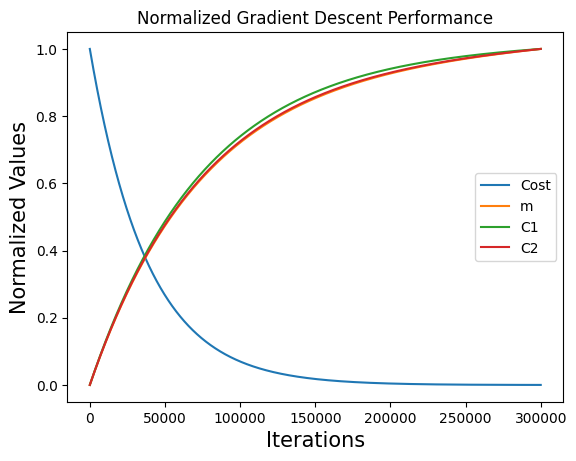

<Figure size 640x480 with 0 Axes>

In [ ]:
#from google.colab import output
#output.enable_custom_widget_manager()
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
#import ipympl

#%matplotlib notebook

def r_sq(y, y_pred):
    ss_res = np.sum((y - y_pred)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

print(round(r_sq(y_exp, V_predicted),5))


unitStr = "[F*min/BTU]"

paramStats = pd.DataFrame({'Cost':costHist, 'm':mHist, 'C1':C1Hist, 'C2': C2Hist})
paramNormalized = paramStats.apply(Normalize)
ax=paramNormalized.plot()
ax.set_xlabel('Iterations',fontsize=15)
ax.set_ylabel('Normalized Values',fontsize=15)
ax.set_title('Normalized Gradient Descent Performance')
plt.show()
plt.clf()


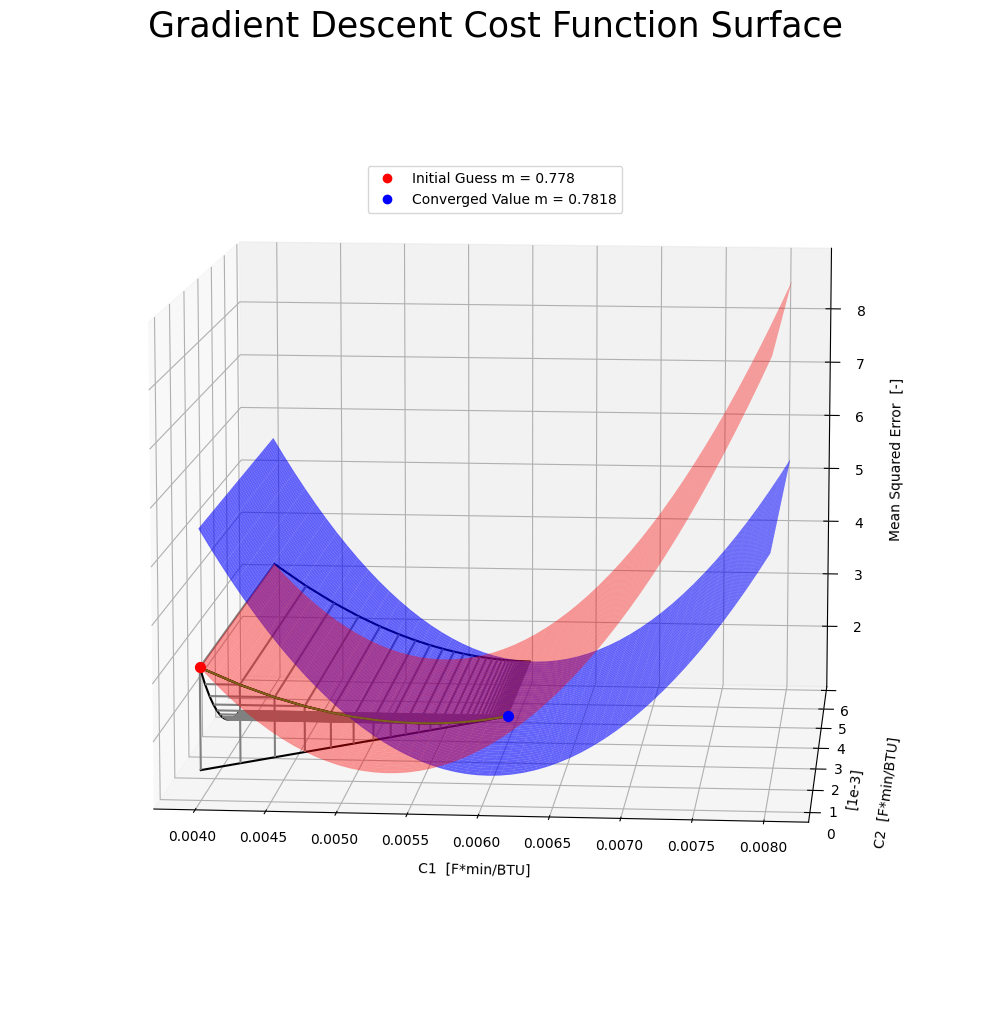

In [ ]:
# Create a grid of C1, C2, and m values
C1_vals = np.linspace(C1-np.max(C1Hist)+np.min(C1Hist), C1+np.max(C1Hist)-np.min(C1Hist), 50)
C2_vals = np.linspace(C2-np.max(C2Hist)+np.min(C2Hist), C2+np.max(C2Hist)-np.min(C2Hist), 50)
C1_grid, C2_grid= np.meshgrid(C1_vals, C2_vals, indexing='ij')

# Evaluate the cost function at each grid point
cost_grid = np.zeros_like(C1_grid)
cost_grid_o = np.zeros_like(C1_grid)
cost_grid_u = np.zeros_like(C1_grid)

for i in range(C1_vals.size):
    for j in range(C2_vals.size):
            cost_grid[i,j] = cost_function(Re=x_exp, V=y_exp, C1=C1_vals[i], C2=C2_vals[j], m=m)
            cost_grid_o[i,j] = cost_function(Re=x_exp, V=y_exp, C1=C1_vals[i], C2=C2_vals[j], m=mHist[0])
            #cost_grid_u[i,j] = cost_function(Re=x_exp, V=y_exp, C1=C1_vals[i], C2=C2_vals[j], m=m*0.99995)

fig = plt.figure(figsize=(10,10))
# Plot the surface
ax = fig.add_subplot(111, projection='3d',computed_zorder=False)

m1LegendPlaceholder = mpl.lines.Line2D([0],[0], linestyle="none", c='g', marker = 'd')
m2LegendPlaceholder = mpl.lines.Line2D([0],[0], linestyle="none", c='red', marker = 'd')
mLegendPlaceholder = mpl.lines.Line2D([0],[0], linestyle="none", c='b', marker = 'o')
minitLegendPlaceholder = mpl.lines.Line2D([0],[0], linestyle="none", c='red', marker = 'o')

ax.legend([minitLegendPlaceholder, mLegendPlaceholder],
          [f'Initial Guess m = {round(mHist[0], 4)}', f'Converged Value m = {round(m, 4)}'],
          numpoints=1,
          loc='center',
          bbox_to_anchor=(0.5, 0.85),
          prop={'size': 10},
          frameon=True)


decN = 10000
surf1 = ax.plot_surface(C1_grid, C2_grid, cost_grid, rstride=1, cstride=1,alpha=0.6, facecolor='b', label = f"m = {m}[-]", zorder = 4)
surf2 = ax.plot_surface(C1_grid, C2_grid, cost_grid_o, rstride=1, cstride=1,alpha=0.4, facecolor='red', label = f"m = {mHist[0]}[-]", zorder = 5)
#surf3 = ax.plot_surface(C1_grid, C2_grid, cost_grid_u, rstride=1, cstride=1, zorder=1, alpha=0.3, facecolor='green', label = f"m = {m*0.99995}[-]")
ax.stem(C1Hist[::decN],C2Hist[::decN],costHist[::decN], markerfmt = 'black', linefmt = 'gray', basefmt = 'black', bottom = min(costHist))
ax.stem(C1Hist[::decN],C2Hist[::decN],costHist[::decN], markerfmt = 'black', linefmt = 'gray', basefmt = 'black', bottom = C2_vals.max(), orientation = 'y')
ax.stem(C1Hist[::decN],C2Hist[::decN],costHist[::decN], markerfmt = 'black', linefmt = 'gray', basefmt = 'black', bottom = C1_vals.min(), orientation = 'x')
ax.plot(C1Hist[::decN], C2Hist[::decN], costHist[::decN], zorder = 4.5)
plt.tight_layout()
ax.view_init(elev=10., azim=-85, roll=0)

# Set the labels for the axes and the title of the plot
ax.set_xlabel(f'C1  {unitStr}', labelpad = 10)
ax.set_ylabel(f'[1e-3]\n\nC2  {unitStr}', labelpad = 10)
ax.set_zlabel('Mean Squared Error  [-]', labelpad = 20)
ax.tick_params(axis='z', which='major', pad=10)
ax.zaxis.label.set_rotation(-90)
ax.set_title('Gradient Descent Cost Function Surface', fontsize = 25, pad = -10)

#fig.subplots_adjust(right=0.1)

# Pad margins so that markers don't get clipped by the axes


# Add the marker for the final convergence point
ax.scatter(C1, C2, costHist[-1], s=50, c='blue', marker='o', edgecolor='blue', zorder=10, alpha=1)
ax.scatter(C1Hist[0], C2Hist[0], costHist[0], s=50, c='red', marker='o', edgecolor='red', zorder=10, alpha=1)


plt.show()

# ***Presentation***


m = 0.8, C1 = 0.00010767200000000001, C2 = 0.2957141765




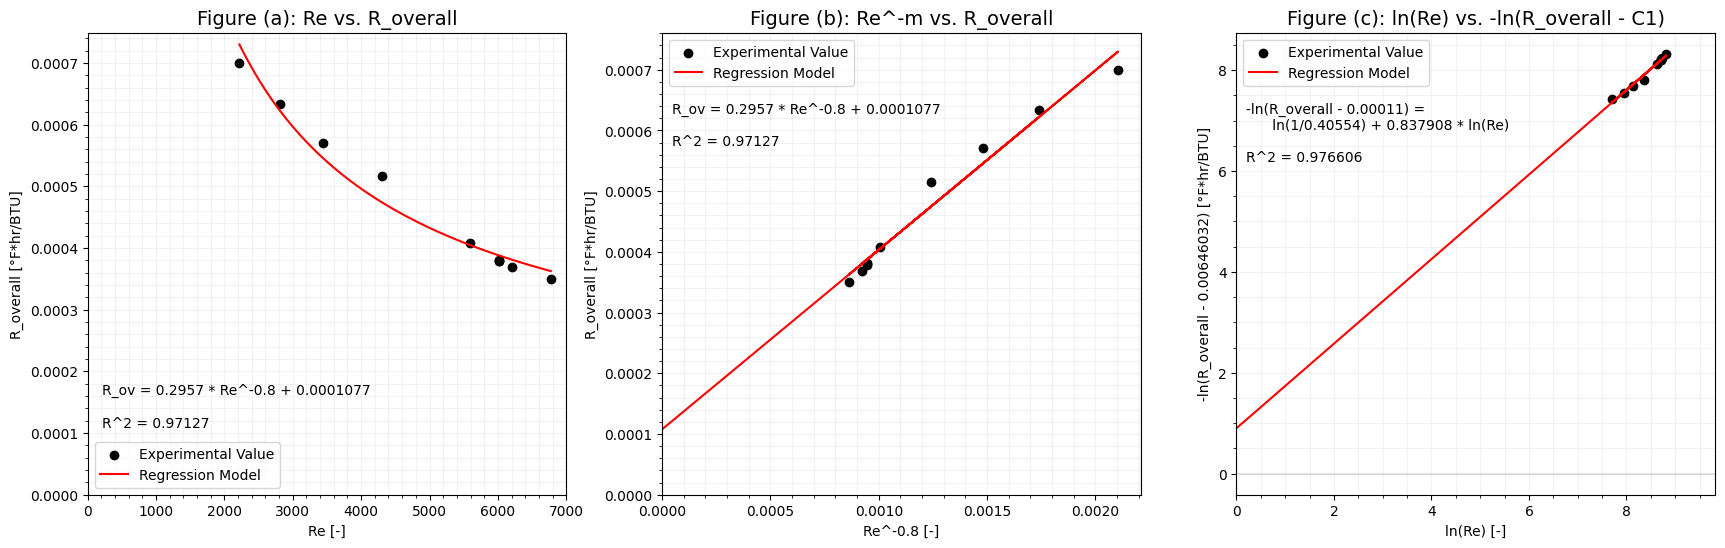

In [ ]:
vhxData = (
    "re rovMinUnit\n"
    "6013.65484209397 0.022713894981653\n"
    "4299.36552656988 0.0309486770842852\n"
    "2219.32711600658 0.0419503878458348\n"
    "6013.65484209397 0.0227621850881031\n"
    "6773.58412402663 0.0209944472433021\n"
    "5595.04688718767 0.0244406067040961\n"
    "6022.4420150171 0.0228548369117272\n"
    "3442.12199917466 0.0342164317789721\n"
    "2813.2518587363 0.0379912955215295\n"
    "6207.06468852645 0.0221336115204703\n",
)

vhxData = pd.read_csv(StringIO(vhxData[0]), sep=" ", header=0)
vhxData['rovHrUnit']=vhxData['rovMinUnit']/60

shxData = (
    "re rovMinUnit\n"
    "6013.65484209397 0.022713894981653\n"
    "4299.36552656988 0.0309486770842852\n"
    "2219.32711600658 0.0419503878458348\n"
    "6013.65484209397 0.0227621850881031\n"
    "6773.58412402663 0.0209944472433021\n"
    "5595.04688718767 0.0244406067040961\n"
    "6022.4420150171 0.0228548369117272\n"
    "3442.12199917466 0.0342164317789721\n"
    "2813.2518587363 0.0379912955215295\n"
    "6207.06468852645 0.0221336115204703\n",
)

shxData = pd.read_csv(StringIO(shxData[0]), sep=" ", header=0)
shxData['rovHrUnit']=shxData['rovMinUnit']/60

#override
C1 = 0.00646032/60
C2 = 17.74285059/60
m = 0.8
r2 = 0.97127

print(f"\nm = {m}, C1 = {C1}, C2 = {C2}\n\n")


roundDigits =5

#graph 1
y_exp = np.array(vhxData['rovMinUnit'].values)/60
x_exp = np.array(vhxData['re'].values)
V_predicted = Wilson(x_exp, C1, C2, m)
eqnStr=f'R_ov = {round(C2,roundDigits-1)} * Re^{-round(m,roundDigits)} + {round(C1,roundDigits+2)}\n\nR^2 = {r2}'


#graph 2
V_predicted_wintercept = np.insert(V_predicted, 0, C1)
x2_reg_wintercept = np.insert(x_exp**-m,0, 0)
reg_x2 = np.linspace(min(x_exp), max(x_exp), num=100)
reg_y2 = Wilson(reg_x2,C1,C2,m)

#graph 3
lnMParam = 0.837908
lnIntParam = -3.19181
lnr2 = 0.976606
lnC1 = 0.00646032 # hour base
lnC1Hr = lnC1/60
lnC2Min = np.exp(-lnIntParam) # keeping this in min units
lnC2Hr = lnC2Min/60 #hr unit
lnIntHr = np.log(1/lnC2Hr)
lnRe=np.log(x_exp)
lnRovPart = -np.log(y_exp-lnC1Hr)
lnRegRe = np.insert(lnRe,0,0)
lnRegRovPart = lnRegRe*lnMParam+lnIntHr

lnEqnStr = f"-ln(R_overall - {round(lnC1Hr,roundDigits)}) =\n      ln(1/{round(lnC2Hr,roundDigits)}) + {lnMParam} * ln(Re)\n\nR^2 = {lnr2}"

##########################


fig, axs = plt.subplots(1, 3, figsize=(21, 6))

# Plot on the first subplot
axs[0].grid(which='both', color='gray', linestyle='-', alpha=0.1)
axs[0].minorticks_on()
axs[0].scatter(x_exp,y_exp,color='black', label = "Experimental Value")
axs[0].plot(reg_x2, reg_y2, color = 'red', label = "Regression Model")
axs[0].set_xlabel("Re [-]")
axs[0].set_ylabel("R_overall [°F*hr/BTU]")
axs[0].set_title("Figure (a): Re vs. R_overall", fontsize=14)
axs[0].legend(loc='lower left')
axs[0].set_xlim(left=0)
axs[0].set_ylim(bottom=0)
axs[0].text(0.03, 0.14, eqnStr, transform=axs[0].transAxes, va='bottom', ha='left', fontsize=10)




# Plot on the sec subplot
axs[1].grid(which='both', color='gray', linestyle='-', alpha=0.1)
axs[1].minorticks_on()
axs[1].scatter(x_exp**-m,y_exp,color='black', label = "Experimental Value")
axs[1].plot(x2_reg_wintercept, V_predicted_wintercept, color = 'red', label = "Regression Model")
axs[1].set_xlabel(f"Re^-{m} [-]")
axs[1].set_ylabel("R_overall [°F*hr/BTU]")
axs[1].set_title("Figure (b): Re^-m vs. R_overall", fontsize=14)
axs[1].legend(loc='best')
axs[1].set_xlim(left=0)
axs[1].set_ylim(bottom=0)
axs[1].xaxis.set_ticks(np.arange(0, np.max(x_exp**-m), 0.0005))
axs[1].text(1.22, 0.85, eqnStr, transform=axs[0].transAxes, va='top', ha='left', fontsize=10)




axs[2].grid(which='both', color='gray', linestyle='-', alpha=0.1)
axs[2].minorticks_on()
axs[2].scatter(lnRe,lnRovPart,color='black', label = "Experimental Value")
axs[2].plot(lnRegRe,lnRegRovPart, color = 'red', label = "Regression Model")
axs[2].set_xlabel("ln(Re) [-]")
axs[2].set_ylabel(f"-ln(R_overall - {lnC1}) [°F*hr/BTU]")
axs[2].set_title("Figure (c): ln(Re) vs. -ln(R_overall - C1)", fontsize=14)
axs[2].legend(loc='upper left')
axs[2].set_xlim(left=0)
axs[2].set_xlim(right=round(max(np.log(x_exp))+1,2))
axs[2].text(2.42, 0.85, lnEqnStr, transform=axs[0].transAxes, va='top', ha='left', fontsize=10)
axs[2].axhline(y=0, color='black', linestyle='-',alpha=0.1)
plt.show()

# ***Auxillary Data Calculations***

In [ ]:
# Create a list of numbers from 32 to 200 with 0.2 intervals using the numpy arange function
numbers = np.arange(32, 300.2, 0.1)

# Create a pandas DataFrame with one column containing the numbers
df = pd.DataFrame({'F': numbers})
df['Dynamic Visc in Seconds'] = df['F'].apply(InterpolateVisc)


stExport = {
    'Saturation Pressure[psia]': np.arange(10,40.1, 0.1),
}

stExport = pd.DataFrame(stExport)

stExport['Temp[F]']=stExport['Saturation Pressure[psia]'].apply(lambda t: np.interp(t, viscTable.iloc[:,1], viscTable.iloc[:,0]))
stExport['Cp[Btu(IT)/(lbm_°F)]']=stExport['Temp[F]'].apply(InterpolateCp)
stExport['Dynamic_Visc[lbm/(ft_s)]']=stExport['Temp[F]'].apply(InterpolateVisc)
stExport['Dynamic_Visc[lbm/(ft_h)]']=stExport['Temp[F]'].apply(InterpolateVisc,args=(False,))
stExport['Prandtl_PleaseCheck[-]']=stExport['Temp[F]'].apply(lambda t: CalculatePrandtl(t) if t < 212 else -1)

print(stExport)

#Find Ho, Hi - see wilson eq 19


resultTable = pd.DataFrame()


# ***Data Exporting***

In [ ]:
shxTable.to_excel('export.xlsx')